## Upset Plot

In [3]:
'''
------------------------------------------------------------------------------
    Upset plot
------------------------------------------------------------------------------
Author: Simone Santoni, simone.santoni.1@city.ac.uk
Dates: - created: 11/11/2020, 2:58:29 PM - last change
Notes: --
'''
# %% load libraries
import numpy as np
import pandas as pd
import upsetplot

In [9]:
# %% fake data
'''
We simulate data on inter-temporal patterns of purchasing behavior (e.g.,
Amazon users buying stuff at different points in time)

The data contain 50 consumers and 5 periods of time; `1' = individual `i'
purchases item ABC at time `j'; 0 = no purchase
'''
# purchases
purchase_patterns = np.random.binomial(n=1, p=1/3, size=(50, 5))
# wrap up data
df = pd.DataFrame(purchase_patterns)
# rename cols
old_cols = df.columns
new_cols = ['t{}'.format(i) for i in old_cols]
df.rename(columns=dict(zip(old_cols, new_cols)), inplace=True)
df.loc[:, 'consumer_id'] = np.arange(0, len(df))
# preview
df.head()

,t0,t1,t2,t3,t4,consumer_id
0,0,0,1,0,0,0
1,0,1,0,0,0,1
2,1,1,0,0,0,2
3,0,1,0,1,1,3
4,0,1,0,0,1,4


In [10]:
# %% manipulate data to create an upset plot
# collapse consumers around common purchasing patterns
df.loc[:, 'count'] = 1
gr = df.groupby(['t0', 't1', 't2', 't3', 't4'])
df = gr['count'].agg(np.sum)
df.head()

t0  t1  t2  t3  t4
0   0   0   0   0     4
                1     2
            1   1     1
        1   0   0     7
                1     3
Name: count, dtype: int64

{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

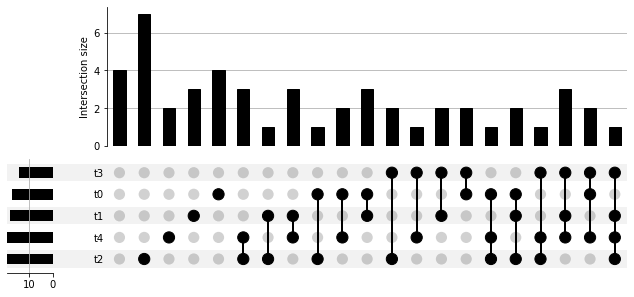

In [11]:
# plot data
upsetplot.plot(df, orientation='horizontal')

## zz